# **Analysis of Ride Patterns and Fare Dynamics in New York City TLC Trips**

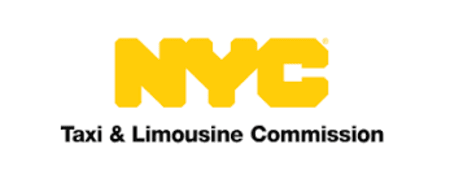



Team:
- Neha Shastri (Project Manager)
- Hyunjin Yu
- Raskirt Bhatia
- Glenn Castellino
- Yifeng Chen
- Quan Nguyen

## Table of Contents:


---



---



*   [Executive Summary](#scrollTo=C8-zfZ3Ese1Y)
*   [Project Proposal](#scrollTo=VBfcOThObVUZ)
*   [Introduction & Motivation](#scrollTo=EsZRkhfaG5_q&line=1&uniqifier=1)
*  [ Data & Source](#scrollTo=gv8Qp4ZR4QYE)
*   [Data Manipulation & Cleaning](#scrollTo=fBl4Dl4exLqd)
* [  Exploratory Data Analysis ](#scrollTo=EupSAgcg97_D)
*  [ Conclusion](#scrollTo=VR7uGgRL7E3n&line=10&uniqifier=1)
*  [ References](#scrollTo=c-VCVIelZSYq&line=1&uniqifier=1)
*  [ Generative AI Disclosure](#scrollTo=gA3gdeJ4YL3G&line=1&uniqifier=1)








##Executive Summary


---



---
This project analyzes ride patterns and fare dynamics for New York City's Taxi and Limousine Commission (TLC) trips, focusing on 2023 data for both yellow and green taxis. The objective is to identify key factors influencing taxi demand, pricing efficiency, and passenger behaviors. The analysis explores trip volumes, fare distribution, and pickup/drop-off patterns across various time periods and locations. Additionally, the project investigates fare elasticity in response to pricing changes and surcharge implementations.

The data was cleaned and processed to remove unrealistic records, categorize trips based on distance, and calculate various metrics like trip duration and fare per mile. Key insights include:

Identification of high-traffic pickup and drop-off zones, with a special focus on areas that experience imbalances in pickups and drop-offs, signaling potential operational inefficiencies.
Analysis of fare elasticity, revealing that a 1% increase in effective fare results in a 0.70% decrease in trip demand, suggesting moderately inelastic demand.
Temporal trends highlighting peak hours for ride demand and fare collection, particularly during morning and evening rush hours, where pricing and trip volumes align with expected commuter behavior.
Visualizations such as fare-to-distance ratios, tip distribution by passenger count, and trip durations by time of day provide actionable insights into how passengers and drivers interact with the taxi system. These findings offer recommendations for optimizing pricing strategies, improving customer satisfaction, and enhancing driver operations by targeting high-demand zones and times.

This project serves as a comprehensive analysis of the factors driving NYC's taxi market, providing key insights for improving both customer experience and revenue generation for taxi operators.


## Project Proposal


---



---



This project aims to analyze trip patterns and fare dynamics in New York City for the year 2023. Our objectives include:


- Identify high-traffic pickup and drop-off zones, focusing on zones with optimal pickup/drop-off ratios.
- Evaluate fare and trip trends across boroughs, examining the relationship between fare rates and trip volume.
- Assess how factors like trip distance, time of day, and payment methods influence fare patterns.
- Analyze tip amounts, average fares, and fare-to-distance ratios for trips of varying lengths.
- Examine fare collection by pickup hour to identify peak periods.
- Compare fare and distance metrics between green and yellow taxis to assess pricing efficiency.
- Analyze temporal trends to understand fluctuations and the impact of external factors.







## Introduction and Motivation



---



---


This project aims to analyze iconic yellow and green taxi usage in NYC, focusing on several key objectives: identifying high-traffic pickup and drop-off zones, evaluating fare and trip trends across boroughs, and examining the impact of factors like trip distance and time of day on fare patterns. Additionally, we will explore customer behavior through tip amounts and fare-to-distance ratios, offering insights into rider satisfaction.

By uncovering these dynamics, we seek to provide actionable insights that can enhance service efficiency and inform transportation policies, ultimately improving the overall experience for passengers in one of the world's busiest urban environments.

## Data & Source

---
---
This dataset is collected by the NYC Taxi and Limousine Commission (TLC) and includes trip records from all trips completed in Yellow and Green taxis in NYC. Records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.





### Data Source


---


NYC Taxi and Limousine Commission Official Page: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

### Column Description


---



| Column | Description | Dtype | Variable Type |
|--------|-------------|-------|---------------|
|1. `PULocationID` | TLC Taxi Zone in which the taximeter was engaged | int64 | Categorical |
|2. `DOLocationID` | TLC Taxi Zone in which the taximeter was disengaged | int64 | Categorical |
|3. `passenger_count` | The number of passengers in the vehicle. This is a driver-entered value | int64 | Numeric |
|4. `trip_distance` | The elapsed trip distance in miles reported by the taximeter | float64 | Numeric |
|5. `fare_amount` | The time-and-distance fare calculated by the meter | float64 | Numeric |
|6. `tip_amount` | This field is automatically populated for credit card tips.<br>Cash thps are not included| float64 | Numeric |
|7. `tolls_amount` | Total amount of all tolls paid in trip | float64 | Numeric |
|8. `total_amount` | The total amount charged to passengers | float64 | Numeric |
|9. `total_surcharge` | The sum of miscellaneous extras, improvement surcharge, congestion surcharge | float64 | Numeric |
|10. `payment_type` | A numeric code signifying how the passenger paid for the trip<br>1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip | int64 | Categorical |
|11. `pickup_date` | The date when the meter was engaged | object | Datetime |
|12. `pickup_time` | The time when the meter was engaged | object | Datetime |
|13. `dropoff_date` | The date when the meter was disengaged | object | Datetime |
|14. `dropoff_time` | The time when the meter was disengaged | object | Datetime|

## Data Manipulation & Cleaning

---





---



### Mounting Google Cloud Bucket


---



We use Google Cloud Storage FUSE to mount and interact with Google Cloud Storage buckets as if they were local file systems.

In [34]:
import pandas as pd
from google.cloud import storage
from google.colab import auth
auth.authenticate_user()

In [35]:
# Add the correct source list for gcsfuse
!echo "deb https://packages.cloud.google.com/apt gcsfuse-$(lsb_release -c -s) main" | sudo tee /etc/apt/sources.list.d/gcsfuse.list

deb https://packages.cloud.google.com/apt gcsfuse-jammy main


In [36]:
# Import the Google Cloud public key
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -
# Update package list and install gcsfuse
!sudo apt-get update
!sudo apt-get install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key is deprecated. Manage keyring files in trusted.gpg.d instead (see apt-key(8)).
100  1022  100  1022    0     0  13028      0 --:--:-- --:--:-- --:--:-- 13102
OK
Hit:1 https://packages.cloud.google.com/apt gcsfuse-jammy InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Rea

In [1]:
mkdir data

In [38]:
!gcsfuse --implicit-dirs ba780_08_nyc_tlc_data data

{"timestamp":{"seconds":1727835914,"nanos":233999101},"severity":"INFO","message":"Start gcsfuse/2.5.0 (Go version go1.23.0) for app \"\" using mount point: /content/data\n"}
{"timestamp":{"seconds":1727835914,"nanos":234067027},"severity":"INFO","message":"GCSFuse config","config":{"AppName":"","CacheDir":"","Debug":{"ExitOnInvariantViolation":false,"Fuse":false,"Gcs":false,"LogMutex":false},"EnableHns":true,"FileCache":{"CacheFileForRangeRead":false,"DownloadChunkSizeMb":50,"EnableCrc":false,"EnableODirect":false,"EnableParallelDownloads":false,"MaxParallelDownloads":192,"MaxSizeMb":-1,"ParallelDownloadsPerFile":16,"WriteBufferSize":4194304},"FileSystem":{"DirMode":"755","DisableParallelDirops":false,"FileMode":"644","FuseOptions":[],"Gid":-1,"IgnoreInterrupts":true,"KernelListCacheTtlSecs":0,"RenameDirLimit":0,"TempDir":"","Uid":-1},"Foreground":false,"GcsAuth":{"AnonymousAccess":false,"KeyFile":"","ReuseTokenFromUrl":true,"TokenUrl":""},"GcsConnection":{"BillingProject":"","ClientP

### Data Cleaning


---



In [ ]:
# Yellow Trip Data

import pandas as pd

base_url = ('/content/data/yellow_trips/yellow_2023/')
months = range(1, 13)
df = pd.DataFrame()
i = 1

df_list_yellow = []

for month in months:
        # Construct the filename and URL
        filename = f'yellow_tripdata_2023-{month:02}.parquet'
        url = f'{base_url}{filename}'

        try:
            # Read the Excel file from the URL into a DataFrame
            df_tmp = pd.read_parquet(url)

            #drop records with missing values
            df_tmp.dropna(inplace=True)

            # rename columns to enable drop
            if 'Airport_fee' in df_tmp.columns:
                df_tmp.rename(columns={'Airport_fee': 'airport_fee'}, inplace=True)

            # drop not used columns
            df_tmp.drop(columns=['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'airport_fee', 'mta_tax'], inplace=True)

            # drop passenger count 0
            df_tmp.drop(df_tmp[df_tmp['passenger_count']==0].index, inplace=True)

            # split date and time
            df_tmp['tpep_pickup_datetime'] = pd.to_datetime(df_tmp['tpep_pickup_datetime'])
            df_tmp['pickup_date'] = df_tmp['tpep_pickup_datetime'].dt.date
            df_tmp['pickup_time'] = df_tmp['tpep_pickup_datetime'].dt.time

            df_tmp['tpep_dropoff_datetime'] = pd.to_datetime(df_tmp['tpep_dropoff_datetime'])
            df_tmp['dropoff_date'] = df_tmp['tpep_dropoff_datetime'].dt.date
            df_tmp['dropoff_time'] = df_tmp['tpep_dropoff_datetime'].dt.time

            #drop old col
            df_tmp.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

            #correct datatype
            df_tmp['passenger_count'] = df_tmp['passenger_count'].astype(int)

            # aggregate surcharges (extra, improvement_surcharge, congestion_surcharge)
            df_tmp['total_surcharge'] = df_tmp['improvement_surcharge'] + df_tmp['extra'] + df_tmp['congestion_surcharge']
            df_tmp.drop(columns=['improvement_surcharge', 'extra', 'congestion_surcharge'], inplace=True)

            df_list_yellow.append(df_tmp)

        except Exception as e:
            # Handle exceptions (e.g., file not found) and continue
            print(f'Failed to read {filename}: {e}')



In [ ]:
# Green Trip Data

base_url = '/content/data/green_trips/green_2023'
months = range(1,13)
df_list_green = []

for month in months:
  # Construct the filename and URL
  filename = f'green_tripdata_2023-{month:02}.parquet'
  url = f'{base_url}/{filename}'

  try:
    # Read the parquet file from the URL into a DataFrame
    df_tmp = pd.read_parquet(url)
    # drop not used columns
    df_tmp.drop(columns=['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'trip_type', 'ehail_fee', 'mta_tax'], inplace=True)

    # drop Null & NaN
    df_tmp.dropna(inplace=True)

    # drop passenger count 0
    df_tmp[df_tmp['passenger_count']==0].count() # 336 vlaues
    df_tmp.drop(df_tmp[df_tmp['passenger_count']==0].index, inplace=True)

    #split date and time
    df_tmp['lpep_pickup_datetime'] = pd.to_datetime(df_tmp['lpep_pickup_datetime'])
    df_tmp['pickup_date'] = df_tmp['lpep_pickup_datetime'].dt.date
    df_tmp['pickup_time'] = df_tmp['lpep_pickup_datetime'].dt.time

    df_tmp['lpep_dropoff_datetime'] = pd.to_datetime(df_tmp['lpep_dropoff_datetime'])
    df_tmp['dropoff_date'] = df_tmp['lpep_dropoff_datetime'].dt.date
    df_tmp['dropoff_time'] = df_tmp['lpep_dropoff_datetime'].dt.time


    # drop old col
    df_tmp.drop(columns=['lpep_pickup_datetime', 'lpep_dropoff_datetime'], inplace=True)

    #correct datatype
    df_tmp['passenger_count'] = df_tmp['passenger_count'].astype(int)
    df_tmp['payment_type'] = df_tmp['payment_type'].astype(int)

    # aggregate surcharges (extra, improvement_surcharge, congestion_surcharge)
    df_tmp['total_surcharge'] = df_tmp['extra'] + df_tmp['improvement_surcharge'] + df_tmp['congestion_surcharge']

    # drop old col
    df_tmp.drop(columns=['extra', 'improvement_surcharge', 'congestion_surcharge'], inplace=True)

    df_list_green.append(df_tmp)

  except Exception as e:
    # Handle exceptions (e.g., file not found) and continue
    print(f'Failed to read {filename}: {e}')

  # might need to organize columns order



**Summary:** This Python code processes a DataFrame sourced from a Parquet file by executing a series of data cleaning, transformation, and restructuring tasks before appending the results to a list. It begins by reading a Parquet file from a specified URL into a DataFrame (`df_tmp`) and removes any rows with missing data. To ensure consistency across different DataFrames, it renames certain columns and eliminates unnecessary ones, including `VendorID`, `RatecodeID`, `store_and_fwd_flag`, `airport_fee`, and `mta_tax`. The code filters out rows where the `passenger_count` is zero and splits the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns into separate fields for pickup and dropoff dates and times. It also corrects the datatpe of `passenger_count` column to an integer type. Lastly, the code aggregates the values from the `improvement_surcharge`, `extra`, and `congestion_surcharge` columns into a new column called `total_surcharge`, removing the original surcharge columns in the process. These operations collectively prepare the data for further analysis or processing.

### Concatinating Dataframes


---




In [ ]:
#Merging yellow data

if df_list_yellow:
    df_yellow = pd.concat(df_list_yellow, ignore_index=True)
    print("All files have been successfully merged.")
else:
    df_yellow = pd.DataFrame()  # Empty DataFrame if no files were read
    print("No data was merged. Please check the file URLs and availability.")



All files have been successfully merged.


In [ ]:
#Merging green data

if df_list_green:
    df_green = pd.concat(df_list_green, ignore_index=True)
    print("All files have been successfully merged.")
else:
    df_green = pd.DataFrame()  # Empty DataFrame if no files were read
    print("No data was merged. Please check the file URLs and availability.")


All files have been successfully merged.


In [ ]:
df_yellow.to_parquet('/content/data/yellow_trips/yellow_tripdata_2023.parquet', index=False)

In [ ]:
df_green.to_parquet('/content/data/green_trips/green_tripdata_2023.parquet', index=False)

**Summary:** This code snippet concatenates the DataFrames in `df_list` into a single DataFrame containing all 12 months data, using the `pd.concat()` function with the `ignore_index=True` parameter to reset the index in the resulting DataFrame. Upon successful merging of all the DataFrames, it prints a message indicating that the operation has been completed successfully. The DataFrames are saved to a Parquet file located at the specified path. The `to_parquet()` method is used for this operation, with the parameter `index=False` ensuring that the DataFrame index is not included in the output file. This allows for efficient storage of the data in a columnar format, which is optimized for analytical operations and is suitable for large datasets. This operation enables easy access to the processed green trip data for future analysis or sharing.

## Exploratory Data Analysis


---



---



In [39]:
df_yellow = pd.read_parquet('/content/data/yellow_trips/yellow_tripdata_2023.parquet')
df_green = pd.read_parquet('/content/data/green_trips/green_tripdata_2023.parquet')
print(df_yellow.shape)
print(df_green.shape)

(36417865, 14)
(725304, 14)


In [ ]:
df_green.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725304 entries, 0 to 725303
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PULocationID     725304 non-null  int64  
 1   DOLocationID     725304 non-null  int64  
 2   passenger_count  725304 non-null  int64  
 3   trip_distance    725304 non-null  float64
 4   fare_amount      725304 non-null  float64
 5   tip_amount       725304 non-null  float64
 6   tolls_amount     725304 non-null  float64
 7   total_amount     725304 non-null  float64
 8   payment_type     725304 non-null  int64  
 9   pickup_date      725304 non-null  object 
 10  pickup_time      725304 non-null  object 
 11  dropoff_date     725304 non-null  object 
 12  dropoff_time     725304 non-null  object 
 13  total_surcharge  725304 non-null  float64
dtypes: float64(6), int64(4), object(4)
memory usage: 77.5+ MB


In [ ]:
df_yellow.columns


Index(['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'tip_amount', 'tolls_amount',
       'total_amount', 'pickup_date', 'pickup_time', 'dropoff_date',
       'dropoff_time', 'total_surcharge'],
      dtype='object')

In [ ]:
df_green.columns

Index(['PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance',
       'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount',
       'payment_type', 'pickup_date', 'pickup_time', 'dropoff_date',
       'dropoff_time', 'total_surcharge'],
      dtype='object')

In [ ]:
df_yellow.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,pickup_date,pickup_time,dropoff_date,dropoff_time,total_surcharge
0,1,0.97,161,141,2,9.3,0.00,0.0,14.30,2023-01-01,00:32:10,2023-01-01,00:40:36,4.5
1,1,1.10,43,237,1,7.9,4.00,0.0,16.90,2023-01-01,00:55:08,2023-01-01,01:01:27,4.5
2,1,2.51,48,238,1,14.9,15.00,0.0,34.90,2023-01-01,00:25:04,2023-01-01,00:37:49,4.5
3,1,1.43,107,79,1,11.4,3.28,0.0,19.68,2023-01-01,00:10:29,2023-01-01,00:21:19,4.5
4,1,1.84,161,137,1,12.8,10.00,0.0,27.80,2023-01-01,00:50:34,2023-01-01,01:02:52,4.5


In [ ]:
df_green.head()

,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,payment_type,pickup_date,pickup_time,dropoff_date,dropoff_time,total_surcharge
0,166,143,1,2.58,14.9,4.03,0.0,24.18,1,2023-01-01,00:26:10,2023-01-01,00:37:11,4.75
1,24,43,1,1.81,10.7,2.64,0.0,15.84,1,2023-01-01,00:51:03,2023-01-01,00:57:49,2.00
2,223,179,1,0.00,7.2,1.94,0.0,11.64,1,2023-01-01,00:35:12,2023-01-01,00:41:32,2.00
3,41,238,1,1.30,6.5,1.70,0.0,10.20,1,2023-01-01,00:13:14,2023-01-01,00:19:03,1.50
4,41,74,1,1.10,6.0,0.00,0.0,8.00,1,2023-01-01,00:33:04,2023-01-01,00:39:02,1.50


### 1. Correlation matrix


---



**Question**: What is the relationship between all the parameters in the dataframe?

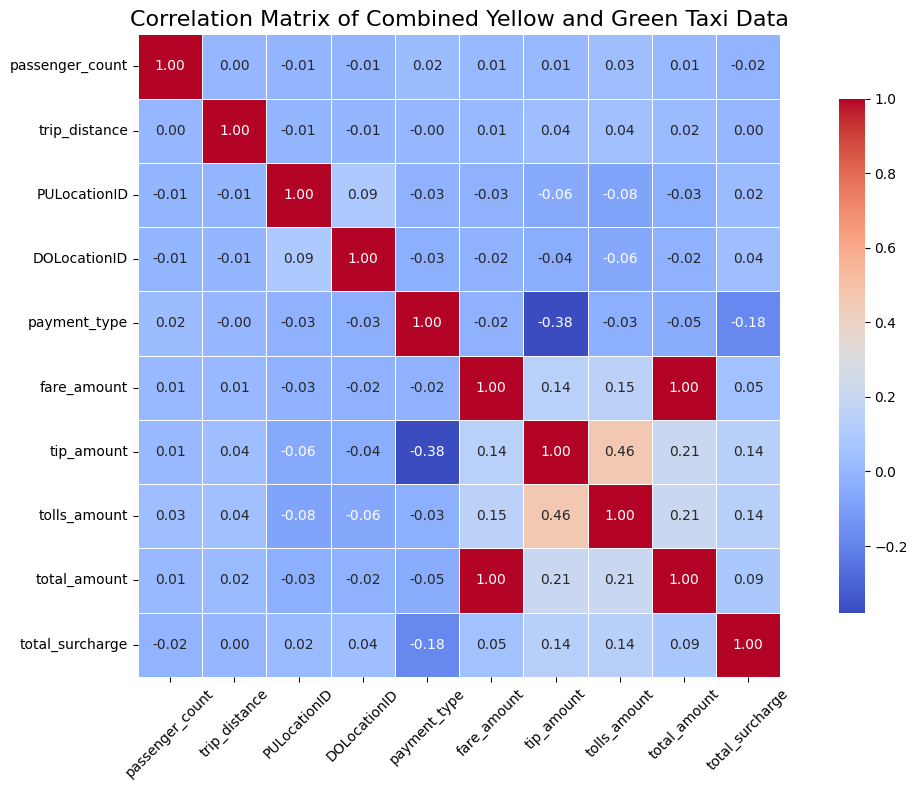

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert any date columns to datetime if not already done
df_yellow['pickup_date'] = pd.to_datetime(df_yellow['pickup_date'])
df_yellow['dropoff_date'] = pd.to_datetime(df_yellow['dropoff_date'])

df_green['pickup_date'] = pd.to_datetime(df_green['pickup_date'])
df_green['dropoff_date'] = pd.to_datetime(df_green['dropoff_date'])

# Append df_green to df_yellow
df_combined = pd.concat([df_yellow, df_green], ignore_index=True)

# Drop non-numeric columns or convert them as needed
numeric_df_combined = df_combined.select_dtypes(include=['number'])

# Compute the correlation matrix on the numeric DataFrame
correlation_matrix = numeric_df_combined.corr()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix,
            annot=True,               # Annotate the cells with the correlation coefficients
            fmt='.2f',               # Format for the annotations
            cmap='coolwarm',         # Colormap for the heatmap
            square=True,             # Make the cells square-shaped
            linewidths=0.5,         # Lines between the cells
            cbar_kws={"shrink": .8}) # Shrink the color bar

# Title and labels
plt.title('Correlation Matrix of Combined Yellow and Green Taxi Data', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


**Summary**: The correlation matrix offers a clear visualization of how different parameters are interrelated. By understanding these relationships, we establish a solid foundation for further analysis and the application of various frameworks to the dataset.


###  2. Fare Distribution across Borough's


---



**Question**: What is the ratio of trip for each Borough? What is the average fare for the same?


In [41]:
!pip install tabulate

In [43]:
import pandas as pd
from tabulate import tabulate

location_name = pd.read_csv('/content/data/taxi_zone_lookup.csv')

# Merge df_yellow and df_green with location_name
with_location_name_yellow = pd.merge(df_yellow, location_name, how='left', left_on='PULocationID', right_on='LocationID')
with_location_name_green = pd.merge(df_green, location_name, how='left', left_on='PULocationID', right_on='LocationID')

# Clean the 'Borough' column
with_location_name_yellow['Borough'] = with_location_name_yellow['Borough'].str.strip().str.title().fillna('Unknown')
with_location_name_green['Borough'] = with_location_name_green['Borough'].str.strip().str.title().fillna('Unknown')

# Yellow Zone
order_count_by_zone_yellow = with_location_name_yellow.groupby('Borough').size()
total_orders_yellow = order_count_by_zone_yellow.sum()
order_ratio_by_zone_yellow = (order_count_by_zone_yellow / total_orders_yellow) * 100
average_fare_by_zone_yellow = with_location_name_yellow.groupby('Borough')['total_amount'].mean()

zone_summary_yellow = pd.DataFrame({
    'trip_count': order_count_by_zone_yellow,
    'trip_ratio (%)': order_ratio_by_zone_yellow,
    'average_fare ($)': average_fare_by_zone_yellow
}).sort_values(by='average_fare ($)', ascending=False).round(2).reset_index()

# Green Zone
order_count_by_zone_green = with_location_name_green.groupby('Borough').size()
total_orders_green = order_count_by_zone_green.sum()
order_ratio_by_zone_green = (order_count_by_zone_green / total_orders_green) * 100
average_fare_by_zone_green = with_location_name_green.groupby('Borough')['total_amount'].mean()

zone_summary_green = pd.DataFrame({
    'trip_count': order_count_by_zone_green,
    'trip_ratio (%)': order_ratio_by_zone_green,
    'average_fare ($)': average_fare_by_zone_green
}).sort_values(by='average_fare ($)', ascending=False).round(2).reset_index()

# Display Using Tabulate for Better Alignment
print("Yellow Zone Summary:\n")
print(tabulate(zone_summary_yellow.head(20), headers='keys', tablefmt='psql', showindex=False))

print("\nGreen Zone Summary:\n")
print(tabulate(zone_summary_green.head(20), headers='keys', tablefmt='psql', showindex=False))

Yellow Zone Summary:

+---------------+--------------+------------------+--------------------+
| Borough       |   trip_count |   trip_ratio (%) |   average_fare ($) |
|---------------+--------------+------------------+--------------------|
| Ewr           |         4958 |             0.01 |             102.68 |
| Queens        |      3684636 |            10.12 |              70.09 |
| Staten Island |         2454 |             0.01 |              64.48 |
| Unknown       |       371504 |             1.02 |              34.52 |
| Bronx         |        59887 |             0.16 |              34.49 |
| Brooklyn      |       206087 |             0.57 |              32.5  |
| Manhattan     |     32088339 |            88.11 |              23.56 |
+---------------+--------------+------------------+--------------------+

Green Zone Summary:

+---------------+--------------+------------------+--------------------+
| Borough       |   trip_count |   trip_ratio (%) |   average_fare ($) |
|------


**Summary:**

- Yellow Zone:
Manhattan has the highest trip ratio at 88.11% with an average fare of $23.56.

  The highest average fare is from EWR (Newark Airport) at $102.68.

- Green Zone:
Manhattan also has the highest trip ratio at 58.05% with an average fare of $20.92.

  EWR  (Newark Airport) has the highest average fare, $107.85.

  In both zones, Manhattan dominates in trip volume, while airport trips have significantly higher fares.

### 3. Trip Volume Distribution across Distance


---



**Question**: What is the distribution of taxi trip volume against distance?

In [ ]:
import pandas as pd
# Get the trips lower than or equal to 200 miles
df_filtered = df_yellow[df_yellow['trip_distance'] <= 200]

# Change trip distance (Miles) to integer
df_filtered['Trip Distance (Miles)'] = df_filtered['trip_distance'].astype(int)

# Get the ratio of each range (0-1, 1-2, 2-3, ...) to the total trip count
trip_distance_mile_distribution = df_filtered['Trip Distance (Miles)'].value_counts(normalize=True).sort_index()

# Convert to percentage
trip_distance_mile_distribution_percentage = trip_distance_mile_distribution * 100

# Make result to percentile (e.g., "0-1", "1-2")
trip_distance_mile_distribution_percentage.index = trip_distance_mile_distribution_percentage.index.map(lambda x: f"{x}-{x+1}")

# Rename the series to a DataFrame with the column name 'Percentage'
percentage_yellow = trip_distance_mile_distribution_percentage.to_frame(name='Yellow Percentage')

# Get the trips lower than or equal to 200 miles for Green Taxis
df_filtered_green = df_green[df_green['trip_distance'] <= 200]

# Change trip distance (Miles) to integer
df_filtered_green['Trip Distance (Miles)'] = df_filtered_green['trip_distance'].astype(int)

# Get the ratio of each range (0-1, 1-2, 2-3, ...) to the total trip count
trip_distance_green_mile_distribution = df_filtered_green['Trip Distance (Miles)'].value_counts(normalize=True).sort_index()

# Convert to percentage
trip_distance_green_mile_distribution_percentage = trip_distance_green_mile_distribution * 100

# Make result to percentile (e.g., "0-1", "1-2")
trip_distance_green_mile_distribution_percentage.index = trip_distance_green_mile_distribution_percentage.index.map(lambda x: f"{x}-{x+1}")

# Rename the series to a DataFrame with the column name 'Percentage'
percentage_green = trip_distance_green_mile_distribution_percentage.to_frame(name='Green Percentage')

# Merge the yellow and green percentage DataFrames
combined_percentage = pd.concat([percentage_yellow, percentage_green], axis=1)

# Print the Combined Distribution in a tabular format
print("Trip Distance Distribution by Miles (<= 200 miles) - Percentages for Yellow and Green Taxi:")
print(combined_percentage.head(20).to_string())

Trip Distance Distribution by Miles (<= 200 miles) - Percentages for Yellow and Green Taxi:
                       Yellow Percentage  Green Percentage
Trip Distance (Miles)                                     
0-1                            22.330579         20.760300
1-2                            32.963836         32.851689
2-3                            16.044768         18.625300
3-4                             7.497005          9.722140
4-5                             3.874522          4.694930
5-6                             2.418747          3.306112
6-7                             1.698216          2.719453
7-8                             1.321638          1.951349
8-9                             1.483286          1.235776
9-10                            1.580048          0.899774
10-11                           1.322078          0.723983
11-12                           0.950003          0.478565
12-13                           0.571056          0.375986
13-14                  

**Summary:**

1. Short Distances (0-1 miles):
  - Yellow Taxis: 22.33% of trips
  - Green Taxis: 20.76% of trips
2. Moderate Distances (1-2 miles):
  - Yellow Taxis: 32.96% of trips
  - Green Taxis: 32.85% of trips
3. Longer Distances (2-5 miles):
  - Yellow Taxis: 24.37% of trips fall between 2-5 miles.
  - Green Taxis: 22.97% of trips fall within the same range.
4. Very Long Distances (5-10 miles):
  - Yellow Taxis: 5.38% of trips
  - Green Taxis: 7.19% of trips

We notice that the majority of trips are less than 4 miles long.

### 4. Peak Revenue Collection Insight


---



**Question**: What is the revenue generated during each hour of the day? What are the peak hours?

In [ ]:
# Extract the hour from the pickup time
df_yellow['pickup_hour'] = pd.to_datetime(df_yellow['pickup_time'], format='%H:%M:%S').dt.hour

# Group by the hour of the day and sum the total amount for each hour
total_fare_by_hour_yellow = df_yellow.groupby('pickup_hour')['total_amount'].sum()
total_fare_all_day_yellow = total_fare_by_hour_yellow.sum()

# Get ratio
total_fare_by_hour_yellow_ratio = (total_fare_by_hour_yellow / total_fare_all_day_yellow) * 100

# Total count of trips per hour
total_trips_yellow = df_yellow.groupby('pickup_hour').size()

# Calculate average fare per trip per hour
average_fare_yellow = total_fare_by_hour_yellow / total_trips_yellow

# Save result to a data frame with average fare
result_yellow_df = pd.DataFrame({
    'total_fare': total_fare_by_hour_yellow,
    'fare_ratio': total_fare_by_hour_yellow_ratio,
    'average_fare': average_fare_yellow,
    'total_trips': total_trips_yellow # Added average fare
})

# Format the index to represent hour ranges (e.g., "0-1", "1-2")
result_yellow_df.index = result_yellow_df.index.map(lambda x: f"{x}-{x+1}")

print("Pickup Hour Insight: Yellow Taxi")
print(result_yellow_df)

# Extract the hour from the pickup time
df_green['pickup_hour'] = pd.to_datetime(df_green['pickup_time'], format='%H:%M:%S').dt.hour

# Group by the hour of the day and sum the total amount for each hour
total_fare_by_hour_green = df_green.groupby('pickup_hour')['total_amount'].sum()
total_fare_all_day_green = total_fare_by_hour_green.sum()

# Get ratio
total_fare_by_hour_green_ratio = (total_fare_by_hour_green / total_fare_all_day_green) * 100

# Total count of trips per hour
total_trips_green = df_green.groupby('pickup_hour').size()

# Calculate average fare per trip per hour
average_fare_green = total_fare_by_hour_green / total_trips_green

# Save result to a data frame with average fare
result_green_df = pd.DataFrame({
    'total_fare': total_fare_by_hour_green,
    'fare_ratio': total_fare_by_hour_green_ratio,
    'average_fare': average_fare_green,
    'total_trips': total_trips_green,# Added average fare
})

# Format the index to represent hour ranges (e.g., "0-1", "1-2")
result_green_df.index = result_green_df.index.map(lambda x: f"{x}-{x+1}")

print("\nPickup Hour Insight: Green Taxi")
print(result_green_df)

Pickup Hour Insight: Yellow Taxi
              total_fare  fare_ratio  average_fare  total_trips
pickup_hour                                                    
0-1          29424861.00    2.838554     28.719958      1024544
1-2          18008544.27    1.737246     26.173041       688057
2-3          11175650.48    1.078091     24.658008       453226
3-4           7643112.27    0.737315     25.732652       297020
4-5           6301796.81    0.607921     32.622893       193171
5-6           7801544.17    0.752598     38.025151       205168
6-7          15524915.72    1.497656     31.650946       490504
7-8          26585486.66    2.564646     27.476807       967561
8-9          35648474.01    3.438933     26.449458      1347796
9-10         41232659.86    3.977627     26.659610      1546634
10-11        45684063.36    4.407045     26.940456      1695742
11-12        49942764.91    4.817873     27.091613      1843477
12-13        54990890.23    5.304855     27.481965      2000981
13-14  

**Summary:**

Both Yellow and Green taxis generate the highest total fares and handle the most trips during 4 PM to 7 PM.

Additionally, their average fare per trip peaks early in the morning between 5 AM and 6 AM.

This pattern shows that taxi demand is concentrated during peak late afternoon times, likely due to people returning home from work and that taxi services charge passengers more during the early morning hours.

### 5. Payment Method Pattern Analysis


---



**Question:** What payment method is prefered by customers?

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 4. Most common payment type
payment_method_mapping = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

# Map the payment_type codes to payment method names in df_green
df_green['payment_method'] = df_green['payment_type'].map(payment_method_mapping)

# Calculate the count of each payment method for green taxis
payment_counts_green = df_green['payment_method'].value_counts().reset_index()
payment_counts_green.columns = ['Payment Method', 'Number of Rides']

# Calculate the percentage for green taxis
payment_counts_green['Percentage'] = (payment_counts_green['Number of Rides'] / payment_counts_green['Number of Rides'].sum()) * 100

# Display the results for green taxis
print("\nPayment Method Distribution for Green Taxis:")
print(payment_counts_green)

# Map the payment_type codes to payment method names in df_yellow
df_yellow['payment_method'] = df_yellow['payment_type'].map(payment_method_mapping)

# Calculate the count of each payment method for yellow taxis
payment_counts_yellow = df_yellow['payment_method'].value_counts().reset_index()
payment_counts_yellow.columns = ['Payment Method', 'Number of Rides']

# Calculate the percentage for yellow taxis
payment_counts_yellow['Percentage'] = (payment_counts_yellow['Number of Rides'] / payment_counts_yellow['Number of Rides'].sum()) * 100

# Display the results for yellow taxis
print("\nPayment Method Distribution for Yellow Taxis:")
print(payment_counts_yellow)


Payment Method Distribution for Green Taxis:
  Payment Method  Number of Rides  Percentage
0    Credit card           477994   65.902573
1           Cash           240445   33.150927
2      No charge             5259    0.725075
3        Dispute             1593    0.219632
4        Unknown               13    0.001792

Payment Method Distribution for Yellow Taxis:
  Payment Method  Number of Rides  Percentage
0    Credit card         29400047   80.729738
1           Cash          6296490   17.289564
2        Dispute           494682    1.358350
3      No charge           226644    0.622343
4        Unknown                2    0.000005


**Summary:**

65.9% of Green taxi rides and 80.7% of Yellow taxi rides are paid by credit card, highlighting that most users prefer to pay using credit card over cash.  

### 6. Tip, Fare variation over Distance and Passenger Counts


---




**Question**: How do average tips and total fares vary based on trip distance, and what does the tip distribution look like for different passenger counts?

Final DataFrame with tip-to-total ratio:
               average_tip  average_total  tip_to_total_ratio
trip_category                                                
short             2.173284      16.878458           12.876082
medium            3.519956      27.226810           12.928271
long              8.062550      67.028617           12.028519


<Figure size 4000x1500 with 0 Axes>

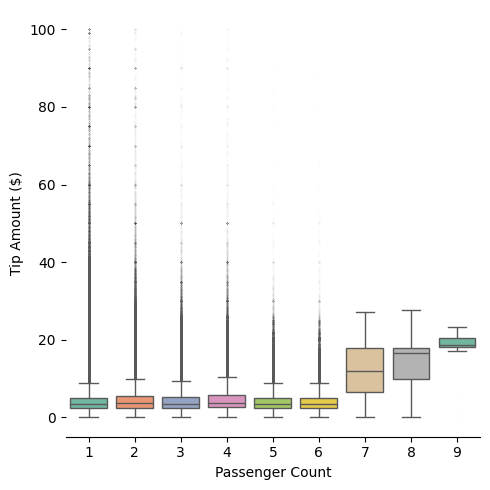

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create trip distance categories: short (< 2 miles), medium (2-5 miles), long (> 5 miles)
df_yellow['trip_category'] = pd.cut(df_yellow['trip_distance'],
                                    bins=[0, 2, 5, float('inf')],
                                    labels=['short', 'medium', 'long'])

# Group by trip category and calculate the average tip amount
average_tip_by_trip_category = df_yellow.groupby('trip_category')['tip_amount'].mean()

# Group by trip category and calculate the average total amount
average_total_by_trip_category = df_yellow.groupby('trip_category')['total_amount'].mean()

# save result
result_df = pd.DataFrame({
    'average_tip': average_tip_by_trip_category,
    'average_total': average_total_by_trip_category
})

# get ratio
result_df['tip_to_total_ratio'] = result_df['average_tip'] / result_df['average_total'] * 100

# show
print("Final DataFrame with tip-to-total ratio:")
print(result_df)

# Tip Amount Distribution by Passenger Count

# Creating the box plot using seaborn's catplot
plt.figure(figsize=(40, 15))
tips_df = df_yellow[(df_yellow['tip_amount'] > 0) & (df_yellow['tip_amount'] < 100)]
tip_box = sns.catplot(data=tips_df,x='passenger_count', y='tip_amount',kind='box', hue='passenger_count', palette='Set2', fliersize = 0.01, legend = False)

# Customize the plot
tip_box.set_axis_labels("Passenger Count", "Tip Amount ($)").set_titles("Tip Amount Distribution by Passenger Count")
tip_box.despine(left=True)  # Remove the left spine for a cleaner look

# Show plot
plt.tight_layout()
plt.show()

**Summary**: We can notice that the average tip and total fare changes for different trip distances. However, the tip to total fare ratio is very similar for all three ranges of trip distance. The box plot shows that while tip amount distribution remains consistent across passenger counts 1-6, the median tip amount increases for passenger counts 7-9. Rides with 1 passenger have the most outliers, and outliers with the highest value.

### 7. Identifying the Hotspots


---



**Question**: Identify the Most Popular Pickup and Drop-off Locations. Which locations have the highest pick up to drop off ratio?

In [44]:
import pandas as pd
from tabulate import tabulate

# Function to get top N zones for pickup and dropoff
def get_top_zones(df, pickup_col_zone, pickup_col_borough, dropoff_col_zone, dropoff_col_borough, top_n=10):
    # Top Pickup Zones
    top_pickup = df.groupby([pickup_col_zone, pickup_col_borough]).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(top_n)

    # Top Dropoff Zones
    top_dropoff = df.groupby([dropoff_col_zone, dropoff_col_borough]).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(top_n)

    return top_pickup, top_dropoff

# Function to display top zones using tabulate
def display_top_zones(top_pickup, top_dropoff, taxi_type):
    print(f"Top 10 {taxi_type} Taxi Pickup Locations (Zone and Borough):\n")
    print(tabulate(top_pickup, headers='keys', tablefmt='psql', showindex=False))
    print(f"\nTop 10 {taxi_type} Taxi Drop-off Locations (Zone and Borough):\n")
    print(tabulate(top_dropoff, headers='keys', tablefmt='psql', showindex=False))
    print("\n" + "-"*80 + "\n")

# Get Top 10 Zones for Green Taxis
top_pickup_green, top_dropoff_green = get_top_zones(
    with_location_name_green, 'Zone', 'Borough', 'Zone', 'Borough', top_n=10
)

# Get Top 10 Zones for Yellow Taxis
top_pickup_yellow, top_dropoff_yellow = get_top_zones(
    with_location_name_yellow, 'Zone', 'Borough', 'Zone', 'Borough', top_n=10
)

# Display Top 10 Zones for Green Taxis
display_top_zones(top_pickup_green, top_dropoff_green, "Green")

# Display Top 10 Zones for Yellow Taxis
display_top_zones(top_pickup_yellow, top_dropoff_yellow, "Yellow")

Top 10 Green Taxi Pickup Locations (Zone and Borough):

+-----------------------------+-----------+---------+
| Zone                        | Borough   |   Count |
|-----------------------------+-----------+---------|
| East Harlem North           | Manhattan |  155115 |
| East Harlem South           | Manhattan |   97075 |
| Forest Hills                | Queens    |   40005 |
| Central Harlem              | Manhattan |   38899 |
| Morningside Heights         | Manhattan |   38147 |
| Elmhurst                    | Queens    |   32159 |
| Central Park                | Manhattan |   32056 |
| Fort Greene                 | Brooklyn  |   21516 |
| Downtown Brooklyn/MetroTech | Brooklyn  |   18562 |
| Jamaica                     | Queens    |   17793 |
+-----------------------------+-----------+---------+

Top 10 Green Taxi Drop-off Locations (Zone and Borough):

+-----------------------------+-----------+---------+
| Zone                        | Borough   |   Count |
|--------------------

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 15.9 MB/s eta 0:00:00


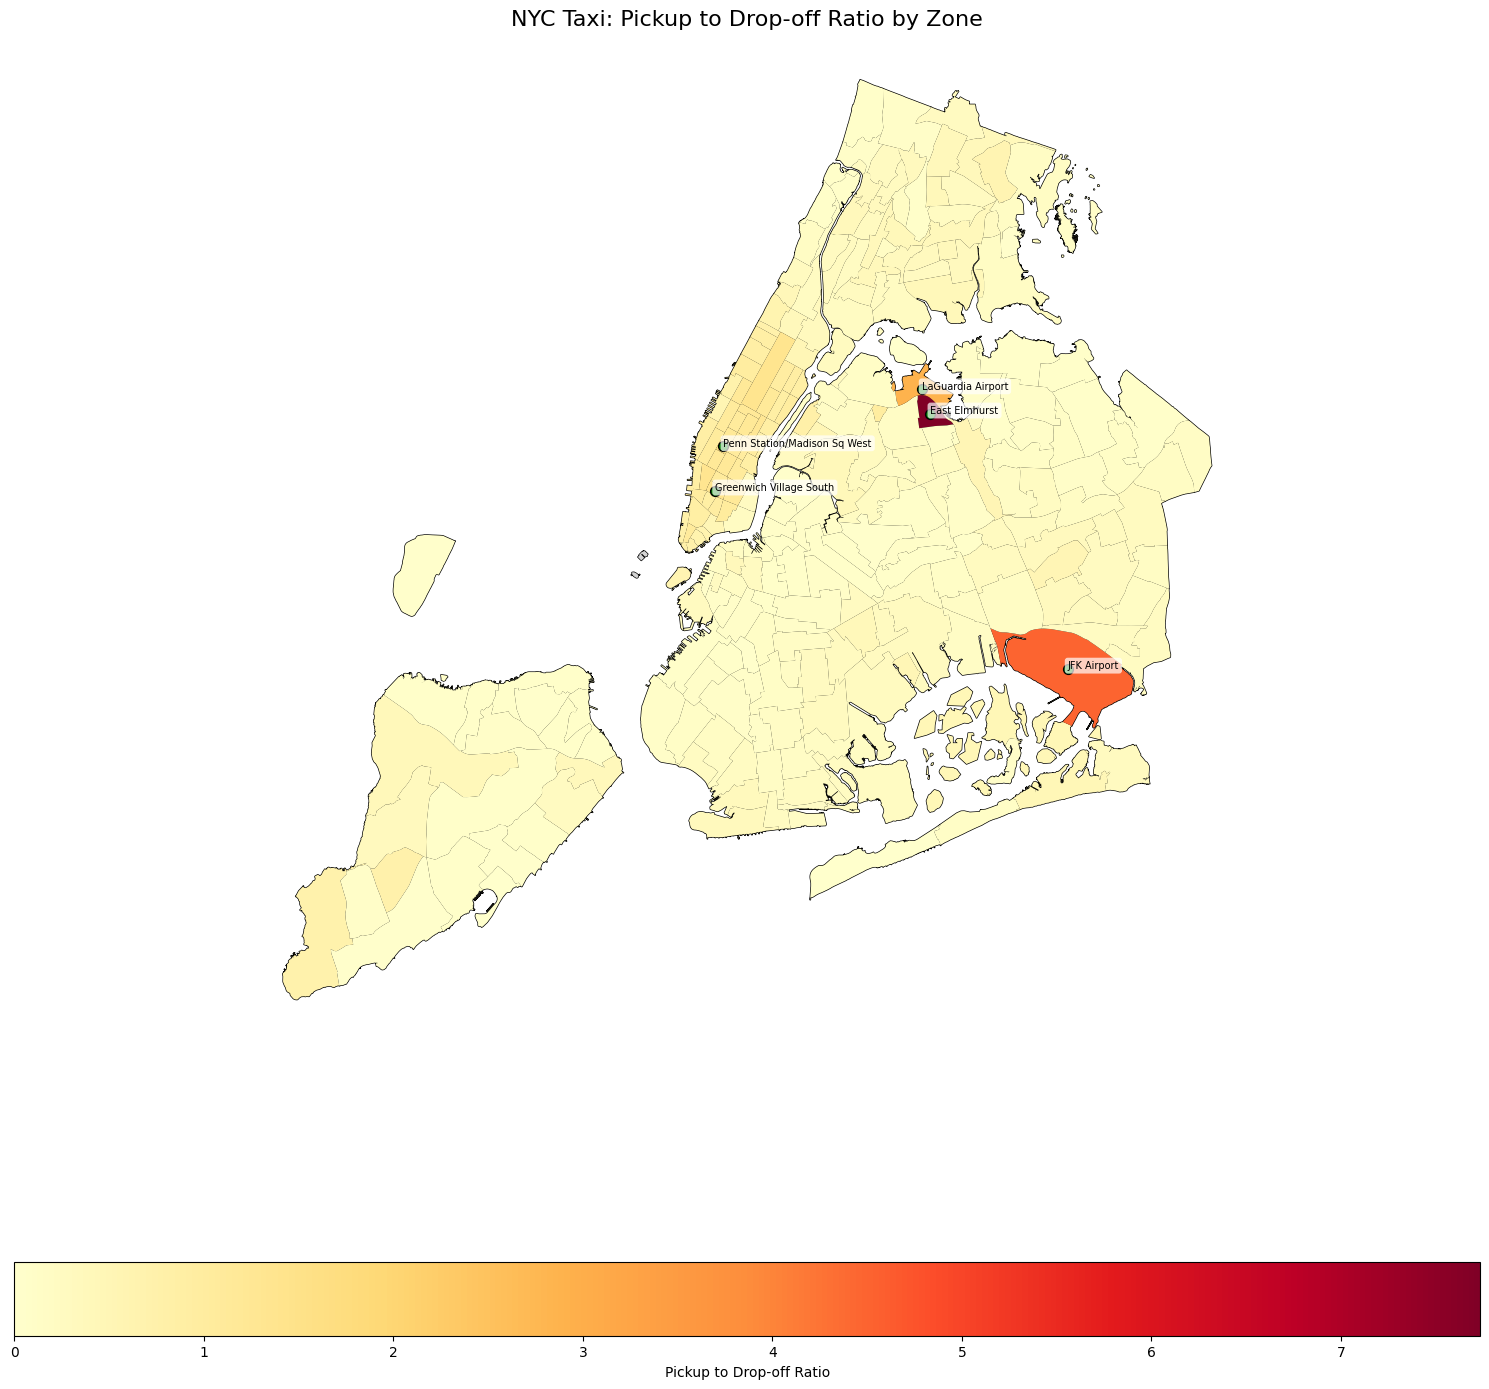

In [ ]:
!pip install geopandas
!pip install statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import statsmodels.api as sm
import seaborn as sns
from shapely.geometry import Point

# Load the datasets
df = pd.read_parquet('/content/data/yellow_trips/yellow_tripdata_2023.parquet')

# Load the shapefile
zones = gpd.read_file('/content/data/yellow_trips/taxi_zones.shp')

# Count pickups and drop-offs for each zone
pickups = df['PULocationID'].value_counts()
dropoffs = df['DOLocationID'].value_counts()

# Calculate the  pickup to drop-offratio
ratio = pickups.div(dropoffs).fillna(0)

# Merge the ratio data with zones
zones['ratio'] = zones['OBJECTID'].map(ratio)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the base map with zones
zones.plot(ax=ax, color='white', edgecolor='black')

# Plot the ratio heatmap
zones.plot(column='ratio', ax=ax, legend=True,
           legend_kwds={'label': 'Pickup to Drop-off Ratio', 'orientation': 'horizontal'},
           cmap='YlOrRd', missing_kwds={'color': 'lightgrey'})

# Customize the plot title and remove axis labels
plt.title('NYC Taxi: Pickup to Drop-off Ratio by Zone', fontsize=16)
plt.axis('off')

# Find the top 5 zones based on pickup-to-dropoff ratio
top_5_zones = ratio.nlargest(5).index

# Match top 5 LocationID's with zone names from the shapefile
top_5_data = zones[zones['OBJECTID'].isin(top_5_zones)]

# Function to adjust annotation position based on centroid location
def get_annotation_offset(centroid, boundary):
    """
    Adjusts the annotation placement depending on the zone's centroid position relative to the plot boundary.
    """
    offset_x = 0
    offset_y = 0

    # Check if centroid is towards the left, right, top, or bottom edge and adjust accordingly
    if centroid.x < boundary.bounds[0] + (boundary.bounds[2] - boundary.bounds[0]) * 0.25:  # Left edge
        offset_x = 0.08  # Shift text to the right
    elif centroid.x > boundary.bounds[0] + (boundary.bounds[2] - boundary.bounds[0]) * 0.75:  # Right edge
        offset_x = -0.08  # Shift text to the left
    if centroid.y < boundary.bounds[1] + (boundary.bounds[3] - boundary.bounds[1]) * 0.25:  # Bottom edge
        offset_y = 0.08  # Shift text upwards
    elif centroid.y > boundary.bounds[1] + (boundary.bounds[3] - boundary.bounds[1]) * 0.75:  # Top edge
        offset_y = -0.08  # Shift text downwards

    return offset_x, offset_y

# Plot circles at the centroids of top 10 zones and label them with zone names
for idx, row in top_5_data.iterrows():
    zone_name = row['zone']  # Assuming the 'zone' column has the zone names
    centroid = row['geometry'].centroid  # Calculate the centroid of each zone
    ax.scatter(centroid.x, centroid.y, color='green', s=50, edgecolor='black', zorder=5)

    # Calculate offset based on location
    offset_x, offset_y = get_annotation_offset(centroid, row['geometry'])

    # Annotate the zone name with the calculated offset
    ax.annotate(text=zone_name, xy=(centroid.x, centroid.y),
                xytext=(centroid.x + offset_x, centroid.y + offset_y),
                ha='left', fontsize=7, color='black', zorder=6,
                bbox=dict(boxstyle="round,pad=0.3", edgecolor="none", facecolor="white", alpha=0.7))

# Display the plot
plt.tight_layout()
plt.show()



**Summary**: We notice similarities in the top pickup and drop off locations in both yellow and green zones. This chart highlights the top 5 locations in NYC with the highest pickup-to-dropoff ratios. A higher ratio suggests that more pickups occur than dropoffs, indicating increased trip demand and lower post-dropoff taxi availability. Notably, airports and railway hubs show the highest ratios, signaling greater demand and more opportunities for prospective drivers in these areas.

### 8. Trip duration and volume distribution in a Day



---



**Question**: How do average trip duration and trip volume vary by hour throughout the day for green taxis?

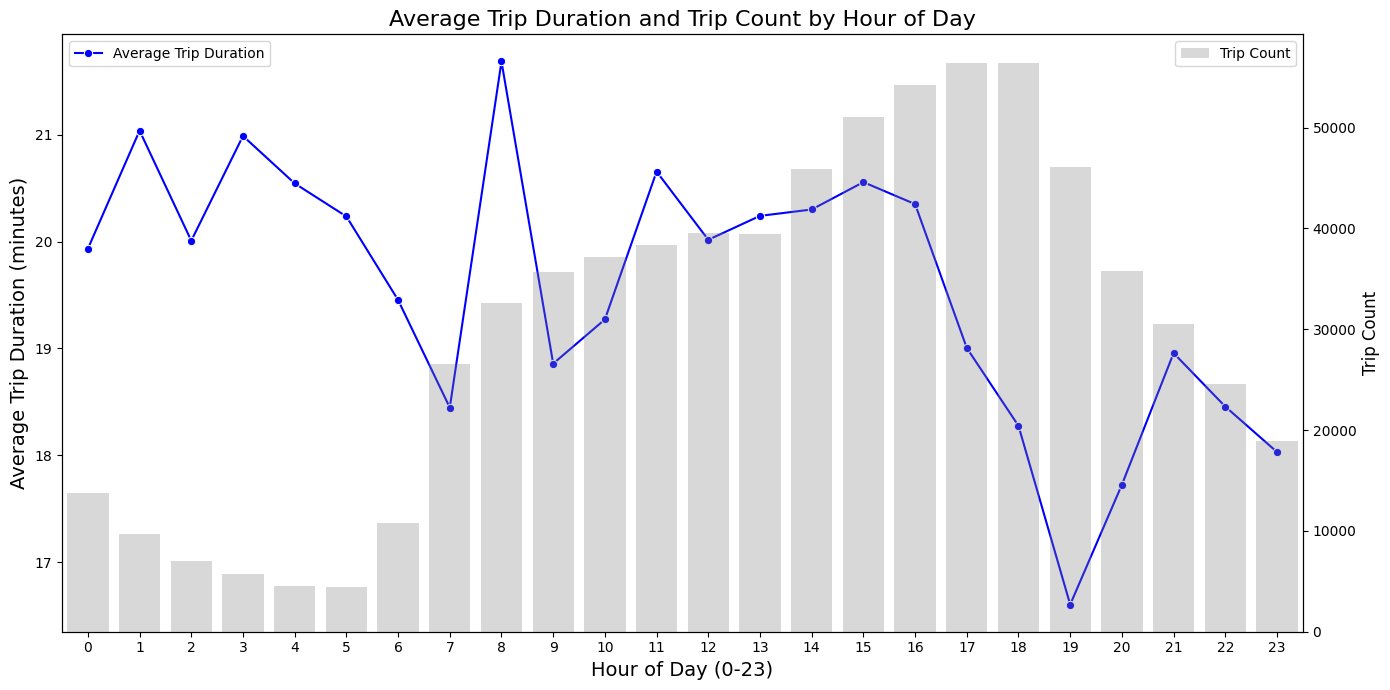

In [ ]:

# Convert 'pickup_date' and 'dropoff_date' to datetime if they are still objects
df_green['pickup_date'] = pd.to_datetime(df_green['pickup_date'], errors='coerce')
df_green['dropoff_date'] = pd.to_datetime(df_green['dropoff_date'], errors='coerce')

# Combine 'pickup_date' and 'pickup_time' into 'pickup_datetime' without string concatenation
df_green['pickup_datetime'] = df_green['pickup_date'] + pd.to_timedelta(df_green['pickup_time'].dt.hour, unit='h') \
                                                      + pd.to_timedelta(df_green['pickup_time'].dt.minute, unit='m') \
                                                      + pd.to_timedelta(df_green['pickup_time'].dt.second, unit='s')

# Extract 'pickup_hour' from 'pickup_datetime'
df_green['pickup_hour'] = df_green['pickup_datetime'].dt.hour

# Calculating Trip Duration
df_green['trip_duration'] = (df_green['dropoff_datetime'] - df_green['pickup_datetime']).dt.total_seconds() / 60

# Aggregate average trip duration and trip count by hour
agg_hour = df_green.groupby('pickup_hour').agg(
    avg_trip_duration=('trip_duration', 'mean'),
    trip_count=('pickup_hour', 'count')
).reset_index()

# Visualization
plt.figure(figsize=(14, 7))

# Plotting Average Trip Duration on the primary y-axis
sns.lineplot(data=agg_hour, x='pickup_hour', y='avg_trip_duration', marker='o', label='Average Trip Duration', color='blue')

# Adding secondary y-axis for trip count
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plotting Trip Count as Bars (grey color)
sns.barplot(data=agg_hour, x='pickup_hour', y='trip_count', alpha=0.3, color='grey', ax=ax2, label='Trip Count')
ax2.set_ylabel('Trip Count', fontsize=12)
ax2.legend(loc='upper right')

# Set axis labels and title
ax1.set_xlabel('Hour of Day (0-23)', fontsize=14)
ax1.set_ylabel('Average Trip Duration (minutes)', fontsize=14)
plt.title('Average Trip Duration and Trip Count by Hour of Day', fontsize=16)

# Display legend
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()


**Summary**:
This chart provides an analysis of the average trip duration and trip count by the hour of the day. The data indicates that the average trip duration peaks during the early morning hours around 6 AM and 7 AM, possibly reflecting longer trips during commuting hours. The trip count, however, peaks between 2 PM and 4 PM, suggesting that afternoon hours are the busiest in terms of ride demand, even though these trips are relatively shorter. There is a noticeable dip in both trip count and trip duration between 1 AM and 5 AM, likely reflecting lower demand during these late-night hours.

### 9. Trip demand fluctuation with increase in Fare

---



**Question**: How does trip demand vary when fares increase due to surge pricing and congestion surcharges for yellow taxis?

                            OLS Regression Results                            
Dep. Variable:         log_trip_count   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     26.74
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           3.01e-06
Time:                        05:00:40   Log-Likelihood:                 196.86
No. Observations:                  60   AIC:                            -389.7
Df Residuals:                      58   BIC:                            -385.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     15

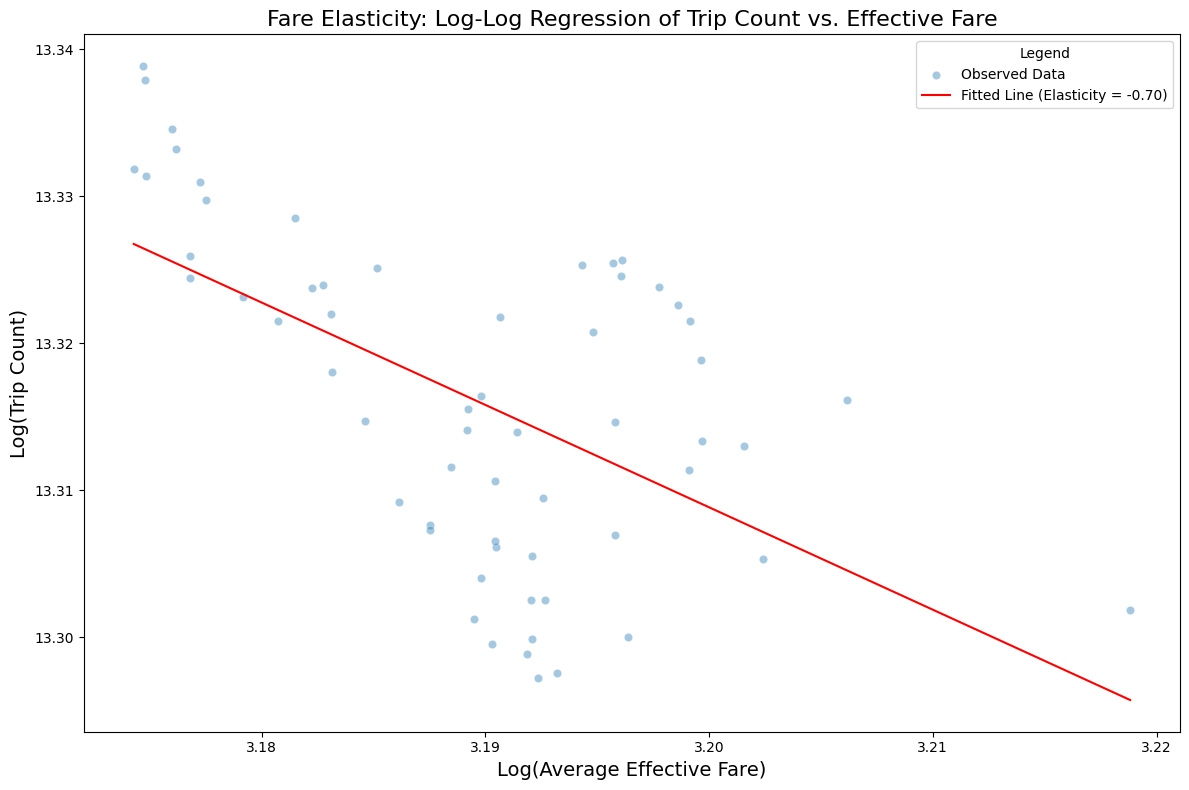

In [ ]:
# Visualizing Fare elasticity in response to surge pricing and congestion surcharge

# Calculate Effective Fare
df_yellow['effective_fare'] = (df_yellow['fare_amount'] + df_yellow['total_surcharge'])

# Convert 'pickup_time' to datetime object and create 'pickup_hour'
df_yellow['pickup_time_dt'] = pd.to_datetime(df_yellow['pickup_time'], format='%H:%M:%S', errors='coerce')
df_yellow['pickup_minute'] = df_yellow['pickup_time_dt'].dt.minute

# Aggregate data by 'pickup_minute'
agg_df = df_yellow.groupby('pickup_minute').agg(trip_count=('trip_distance', 'count'), avg_effective_fare=('effective_fare', 'mean'), avg_trip_distance=('trip_distance', 'mean')).reset_index()

# Remove any records with non-positive fares or trip counts to avoid log issues
agg_df = agg_df[(agg_df['avg_effective_fare'] > 0) & (agg_df['trip_count'] > 0)]

# Apply logarithmic transformation
agg_df['log_trip_count'] = np.log(agg_df['trip_count'])
agg_df['log_avg_effective_fare'] = np.log(agg_df['avg_effective_fare'])

# Model Fitting

# Define the dependent and independent variables
X = agg_df['log_avg_effective_fare']
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = agg_df['log_trip_count']

# Fit the Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

# Extract the elasticity coefficient (slope)
elasticity = model.params['log_avg_effective_fare']

# Visualization

plt.figure(figsize=(12, 8))

# Scatter plot of log-transformed data
sns.scatterplot(x='log_avg_effective_fare', y='log_trip_count', data=agg_df, label='Observed Data', alpha=0.4)

# Plot the regression line
sns.lineplot(x=agg_df['log_avg_effective_fare'], y=model.predict(X), color='red', label=f'Fitted Line (Elasticity = {elasticity:.2f})')

# Set axis labels and title
plt.xlabel('Log(Average Effective Fare)', fontsize=14)
plt.ylabel('Log(Trip Count)', fontsize=14)
plt.title('Fare Elasticity: Log-Log Regression of Trip Count vs. Effective Fare', fontsize=16)

# Display legend
plt.legend(title='Legend')

# Show plot
plt.tight_layout()
plt.show()



**Summary**: By running a log-log regression, we are able to quantify the proportional change in trip count in response to changes in the effective fare. The OLS regression summary provides valuable insights into this relationship. The coefficients are statistically significant, with p-values less than 0.05, indicating that the relationship between the variables is not due to chance. The R-squared value of 0.316, while not extremely high, is reasonable for a model with a single explanatory variable, suggesting that over 31% of the variability in trip count is explained by changes in the effective fare.

The key coefficient, which represents the elasticity of trip demand, is -0.70. In the context of a log-log model, this coefficient directly interprets the percentage change in trip count for a 1% change in effective fare. Specifically, the result indicates that a 1% increase in effective fare leads to a 0.7% decrease in trip count. This elasticity measure provides insight into the sensitivity of trip demand to fare changes, highlighting that demand is somewhat inelastic but still responsive to price variations.

### EDA Summary



---

The visualizations provide key insights into New York City taxi trip patterns and fare dynamics. One significant finding is the Pickup to Drop-off Ratio by Location, which highlights zones where pickups vastly outnumber drop-offs. High ratios in certain areas, such as near transit hubs and residential neighborhoods, reveal optimal zones for drivers to target for more pickups. This insight helps inform driver strategies for maximizing efficiency and reducing downtime between trips.

In addition, the average trip duration and trip count chart shows that trip duration is highest in the early morning, while the trip count peaks during the afternoon. Late-night hours show low demand, reflected in both lower trip counts and shorter durations.

The tip amount distribution remains stable across passenger counts 1-6 and median tip increases for bigger taxis (passenger count 7-9), possibly due to higher fare. Also notice that single-passenger trips exhibit greater variability, suggesting inconsistent tipping behavior. Furthermore, the log-log regression model shows that trip demand is moderately elastic, with a 1% increase in effective fare leading to a 0.69% decrease in trip count. Lastly, the peak pickup times align with expected demand surges during morning and evening rush hours, reinforcing the need for strategic pricing during high-traffic periods.
The correlation matrix shows that fare amount and total amount are highly correlated (1.00).

Collectively, these insights provide a comprehensive understanding of passenger behavior, fare dynamics, and optimal times and locations for drivers to improve their earnings and efficiency.

## Conclusion


---



---



This comprehensive analysis of New York City Taxi and Limousine Commission (TLC) trip data has provided key insights into ride patterns and fare dynamics for 2023. By examining data from yellow and green taxis, we were able to assess critical factors such as peak ride times, demand elasticity, and the effects of trip distance, fare amounts, and passenger behaviors on the overall system.

**Key Findings:**
1. High-Demand Pickup Zones: Analysis of pickup and drop-off zones revealed that certain areas like airports and central business districts exhibit significantly higher ride demand. This suggests that these zones are essential for optimizing fleet allocation and enhancing service efficiency. High pickup-to-dropoff ratios in these areas indicate an ongoing demand for rides, particularly in locations that serve as transit hubs.
2. Trip Distance and Fare Dynamics: Our investigation into trip distances showed a clear relationship between longer trips and higher fare amounts. Shorter trips (under 2 miles) comprised the majority of total rides, but longer trips contributed disproportionately to total fare revenue. This insight is crucial for understanding customer behavior and adjusting pricing strategies to reflect the high value of long-distance trips.
3. Fare Elasticity: A regression analysis on fare elasticity confirmed that while demand is somewhat inelastic, there is a measurable response to fare changes. Specifically, a 1% increase in effective fare results in a 0.7% decrease in trip count. This indicates that while fare increases may generate more revenue in the short term, they could lead to a slight decrease in ride demand.
4. Temporal Patterns and Peak Hours: We identified distinct temporal trends in both ride volume and fare collection. Morning hours, particularly between 6 AM and 9 AM, saw the highest average trip duration, likely driven by commuter traffic. In contrast, the afternoon (2 PM - 4 PM) experienced the highest trip counts, indicating a surge in demand during mid-day hours.
5. Payment Method Insights: Our analysis also revealed the impact of different payment methods on fare dynamics. Credit card payments dominate the data, with associated higher tip amounts. This suggests that providing incentives for cashless transactions could increase overall revenue, especially given the steady increase in electronic payments.

**Recommendations:**
* Optimization of Fleet Distribution: Based on the high pickup-to-dropoff ratios in key zones, we recommend a more dynamic allocation of taxis to high-demand areas, especially during peak hours. Airports and business districts should receive priority in fleet distribution to maximize ride availability and reduce passenger wait times.
* Fare and Pricing Strategies: To address fare elasticity, TLC could consider implementing a more flexible pricing model that responds to demand surges without significantly deterring riders. Given the observed inelasticity, moderate fare increases could be applied during peak periods to boost revenue without severely impacting demand.
* Targeted Incentives for Longer Trips: As longer trips generate disproportionately higher revenue, TLC and taxi companies should explore incentive programs that encourage passengers to take longer trips or ensure the availability of taxis for these routes. Partnering with hotels, tourist destinations, or ride-sharing apps could help achieve this goal.

In conclusion, this analysis provides a robust foundation for improving the operational efficiency of New York City's taxi services. By focusing on demand trends, fare elasticity, and payment behaviors, we believe that taxi services can enhance customer satisfaction while optimizing revenue. Further studies could build on these insights by incorporating real-time data or integrating external factors like weather and public events to provide even more precise recommendations.


## References


---



---


*   Python Date-Time Documentation: https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior
*   Statsmodels Documentation: https://www.statsmodels.org/stable/index.html
*   Geopandas Documentation: https://geopandas.org/en/stable/docs.html
*   Shapely Geometry Documentation:  https://shapely.readthedocs.io/en/stable/geometry.html
*   Seaborn Documentation: https://seaborn.pydata.org/
*   Matplotlib Documentation: https://matplotlib.org/stable/api/pyplot_summary.html









## Generative AI Disclosure:


---



---



Throughout the completion of this project, we utilized Generative AI tools to enhance various aspects of our work. Below is a summary of how these tools contributed:



*   **Content Generation and Grammar Check:** We employed ChatGPT  to assist in brainstorming ideas and structuring the project's initial outline. The AI provided suggestions for refining our thesis statement and identifying key points for each section. We utilised Grammarly to check for any grammatical mistakes.
* **Coding Assistance:** We utilized the open-source AI model Claude to help translate process algorithms into Python code efficiently.
*   **Code Review and Debugging:** Tools such as GitHub Copilot and ChatGPT were utilized to improve our Python code. They provided insights on algorithm optimization and helped resolve potential errors.


All AI-generated content has been thoroughly reviewed, edited, and validated by our team to ensure it meets academic integrity standards and maintains originality and relevance.
